<a href="https://colab.research.google.com/github/challaharijoshika/PRODIGY_ML_02/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_excel(r'/content/Mall_Customers.xlsx')

In [ ]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
x_train=data[["Gender","Annual Income (k$)"]]
x_train2=data[["Gender","Age"]]
x_train3=data[["Gender","Spending Score (1-100)"]]

<Axes: xlabel='Gender', ylabel='Age'>

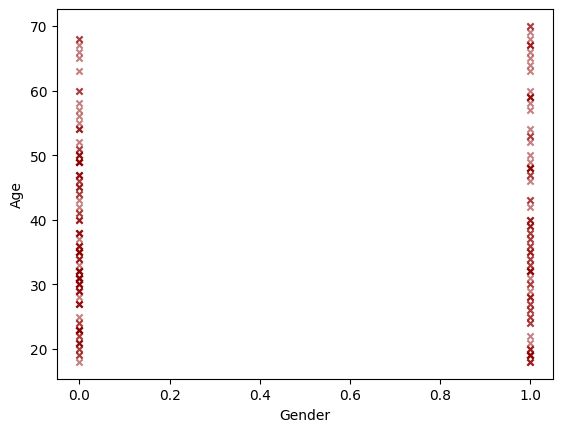

In [ ]:
x_train2.plot.scatter(x="Gender",y="Age",c="darkred",marker="x",alpha=.5)

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

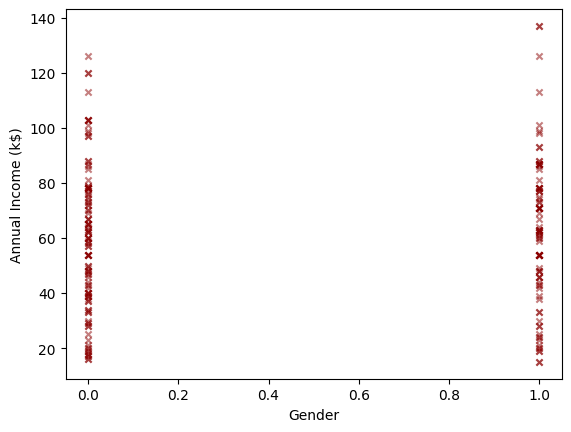

In [ ]:
x_train.plot.scatter(x="Gender",y="Annual Income (k$)",c="darkred",marker="x",alpha=.5)

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

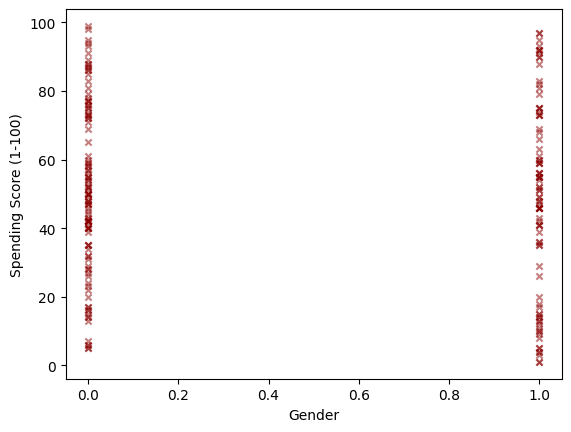

In [ ]:
x_train3.plot.scatter(x="Gender",y="Spending Score (1-100)",c="darkred",marker="x",alpha=.5)

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data['Gender']=l.fit_transform(data['Gender'])

In [ ]:
data['Gender'].unique()

array([1, 0])

In [ ]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [ ]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
model.fit(x_train3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
centroids = model.cluster_centers_
clusters = model.labels_
print(centroids)
print(clusters)

[[ 0.42372881 81.77966102]
 [ 0.41489362 48.18085106]
 [ 0.5106383  14.59574468]]
[1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 1 0 2 0 2 0 1 1 2 0 2 0 2 0 2 0 2
 0 2 0 1 0 1 1 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 1 0
 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 1 0 2 0 1
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


<Axes: title={'center': 'mallsegmentation'}, xlabel='Gender', ylabel='Spending Score (1-100)'>

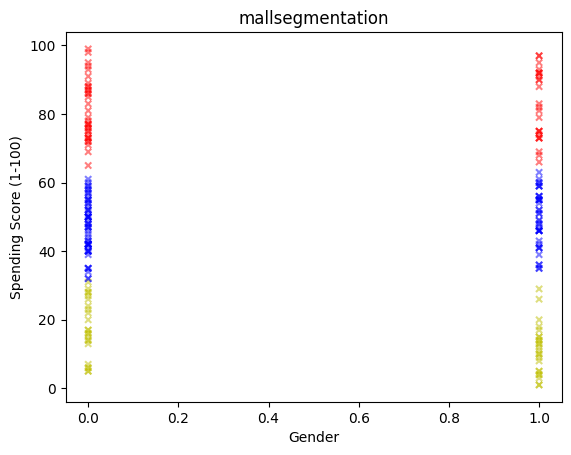

In [ ]:
# Map the cluster numbers to colors.
clusters = pd.Series(clusters).map({
    0: "r",
    1: "b",
    2: "y"
})

x_train3.plot.scatter(x="Gender", y="Spending Score (1-100)",
                     c=clusters, marker="x", alpha=.5, title="mallsegmentation")